In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
#data cleansing
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df_new = df.copy()
df_new = df_new[["BloodPressure", "Insulin", "Glucose", "BMI", "SkinThickness", "Age", "Outcome"]] 
df_new 

,BloodPressure,Insulin,Glucose,BMI,SkinThickness,Age,Outcome
0,72,0,148,33.6,35,50,1
1,66,0,85,26.6,29,31,0
2,64,0,183,23.3,0,32,1
3,66,94,89,28.1,23,21,0
4,40,168,137,43.1,35,33,1
...,...,...,...,...,...,...,...
2763,64,55,75,29.7,24,33,0
2764,72,130,179,32.7,42,36,1
2765,78,0,85,31.2,0,42,0
2766,110,130,129,67.1,46,26,1


In [5]:
#Explorasi data analitik (EDA)
#korelasi pearson
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

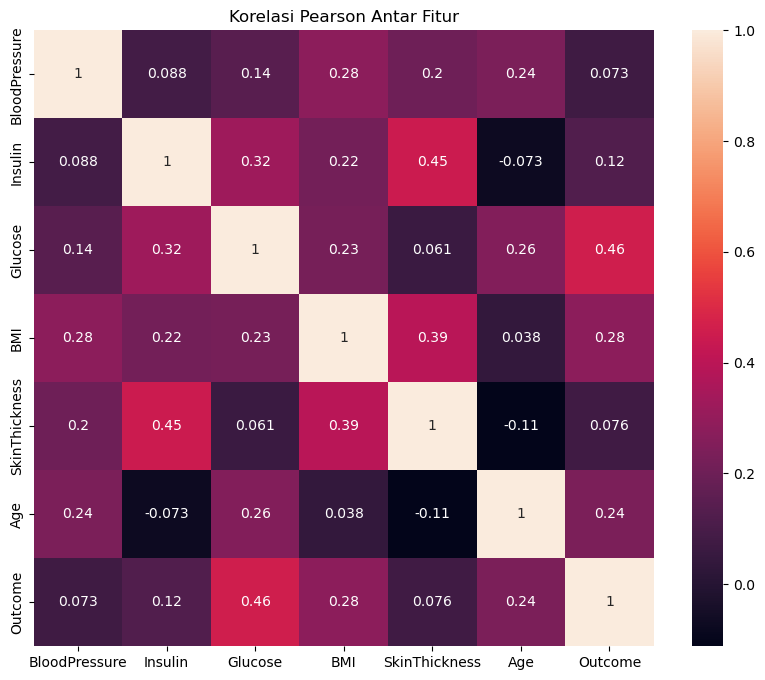

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(), annot=True, )
plt.title("Korelasi Pearson Antar Fitur")
plt.show

In [7]:
x = df_new.drop(columns=["Outcome"])
y = df_new["Outcome"]

In [8]:
#malakukan pelatihan dan pengujian 80:20
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#malakukan pelatihan dan pengujian 80:20
x_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
#malakukan pelatihan dan pengujian 80:20
x_train_60, x_test_40, y_train_60, y_test_40 = train_test_split(x, y, test_size=0.4, random_state=42)

In [42]:
model_nb = GaussianNB()
#latih model 80:20
model_nb.fit(x_train_80, y_train_80)
#melakukan pengujian model
y_pred_train_nb_8020 = model_nb.predict(x_train_80)
y_pred_test_nb_8020 = model_nb.predict(x_test_20)

In [48]:
print("AKURASI MODEL bayes: ", accuracy_score(y_test_20, y_pred_test_nb_8020))

AKURASI MODEL bayes:  0.776173285198556


In [50]:
print(classification_report(y_test_20, y_pred_test_nb_8020))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       367
           1       0.69      0.60      0.65       187

    accuracy                           0.78       554
   macro avg       0.75      0.73      0.74       554
weighted avg       0.77      0.78      0.77       554



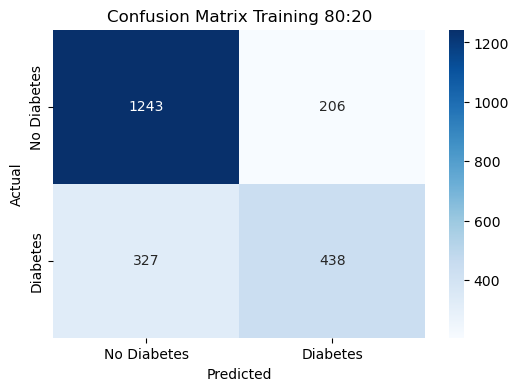

In [60]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_80, y_pred_train_nb_8020), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Training 80:20")
plt.show()

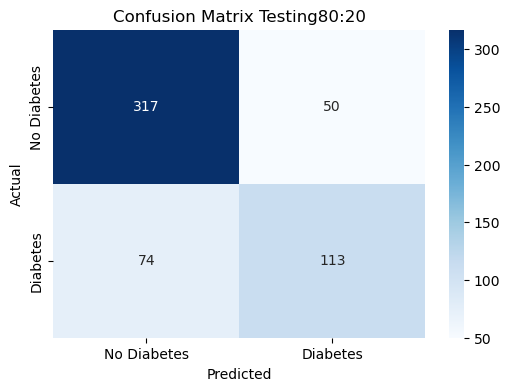

In [62]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_20, y_pred_test_nb_8020), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Testing80:20")
plt.show()

In [64]:
#latih model 80:20
model_nb.fit(x_train_70, y_train_70)
#melakukan pengujian model
y_pred_train_nb_7030 = model_nb.predict(x_train_70)
y_pred_test_nb_7030 = model_nb.predict(x_test_30)

In [66]:
print("AKURASI MODEL bayes: ", accuracy_score(y_test_30, y_pred_test_nb_7030))

AKURASI MODEL bayes:  0.7785800240673887


In [70]:
print(classification_report(y_test_30, y_pred_test_nb_7030))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       562
           1       0.68      0.59      0.63       269

    accuracy                           0.78       831
   macro avg       0.75      0.73      0.74       831
weighted avg       0.77      0.78      0.77       831



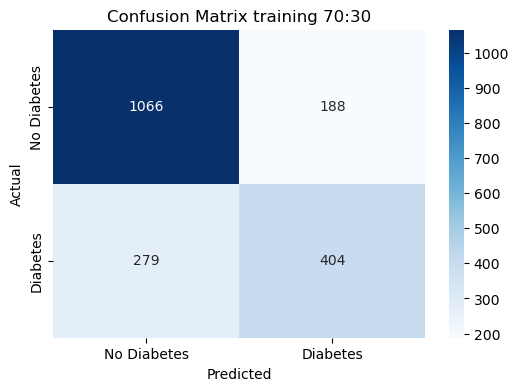

In [76]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_70, y_pred_train_nb_7030), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix training 70:30")
plt.show()

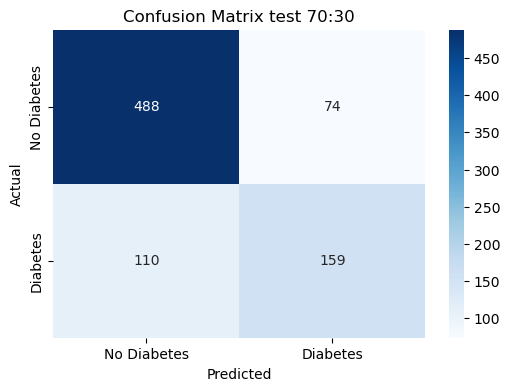

In [94]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_30, y_pred_test_nb_7030), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix test 70:30")
plt.show()

In [88]:
#latih model 80:20
model_nb.fit(x_train_60, y_train_60)
#melakukan pengujian model
y_pred_train_nb_6040 = model_nb.predict(x_train_60)
y_pred_test_nb_6040 = model_nb.predict(x_test_40)

In [90]:
print("AKURASI MODEL bayes: ", accuracy_score(y_test_40, y_pred_test_nb_6040))

AKURASI MODEL bayes:  0.779783393501805


In [92]:
print(classification_report(y_test_40, y_pred_test_nb_6040))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       732
           1       0.71      0.59      0.65       376

    accuracy                           0.78      1108
   macro avg       0.76      0.73      0.74      1108
weighted avg       0.77      0.78      0.77      1108



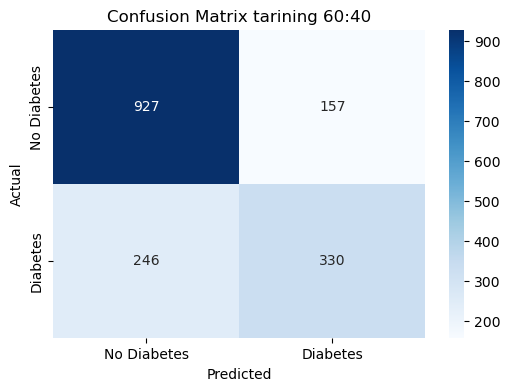

In [98]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_60, y_pred_train_nb_6040), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix tarining 60:40")
plt.show()

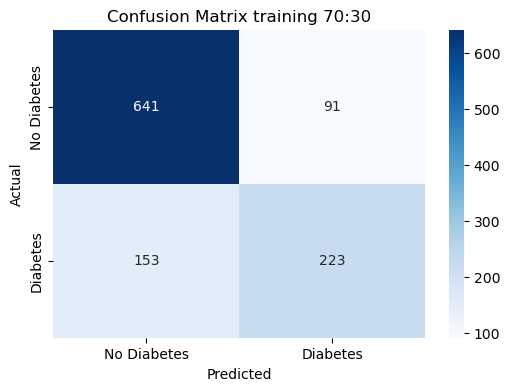

In [100]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_40, y_pred_test_nb_6040), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix training 70:30")
plt.show()

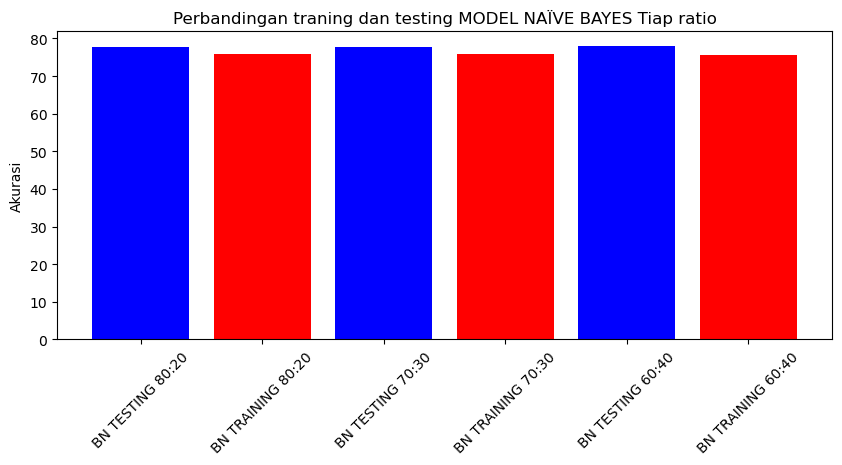

In [114]:
akurasi8020nb_testing = accuracy_score(y_test_20,y_pred_test_nb_8020)*100
akurasi8020nb_training = accuracy_score(y_train_80,y_pred_train_nb_8020)*100

akurasi7030nb_testing = accuracy_score(y_test_30,y_pred_test_nb_7030)*100
akurasi7030nb_training = accuracy_score(y_train_70,y_pred_train_nb_7030)*100

akurasi6040nb_testing = accuracy_score(y_test_40,y_pred_test_nb_6040)*100
akurasi6040nb_training = accuracy_score(y_train_60,y_pred_train_nb_6040)*100

#bikin visualisasi data
plt.figure(figsize=(10,4))
models = ["BN TESTING 80:20","BN TRAINING 80:20","BN TESTING 70:30","BN TRAINING 70:30", "BN TESTING 60:40","BN TRAINING 60:40"]
akurasi = [akurasi8020nb_testing, akurasi8020nb_training, akurasi7030nb_testing, akurasi7030nb_training, akurasi6040nb_testing, akurasi6040nb_training]
warna=["blue","red"]
plt.bar(models,akurasi,color=warna)
plt.ylabel("Akurasi")

plt.title("Perbandingan traning dan testing MODEL NAÏVE BAYES Tiap ratio")
plt.xticks(rotation=45)
plt.show()